In [1]:
import API_functions.file_single as fs
import API_functions.file_batch as fb
import API_functions.image_info as ii
import API_functions.pre_process as pp
import API_functions.threshold_position_independent as tpi

import nibabel as nib
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# A quick check about the method

Image size: (800, 800)
Image is grayscale, not binary image
Getting information completed!


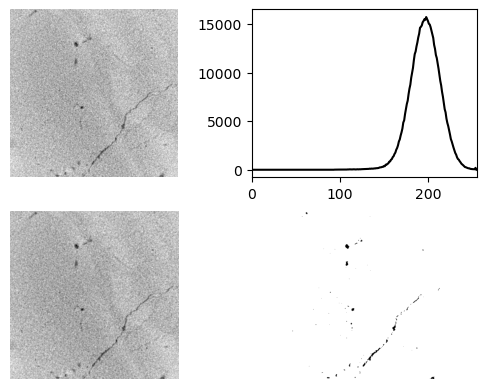

In [18]:
# Read image
path = "e:/0103/reconstruct/"
file_name = "0103_rec00003312.bmp"
image = fs.read_image_opencv(str(os.path.join(path, file_name)))
fs.show_image(image, 4, (2, 2, 1))

# Get image info
ii.get_info(image)
hist = ii.calculate_hist(image)
ii.plot_hist(hist, 4, (2, 2, 2))

# Pre-process image
image_prepropossed = pp.median(image, kernel_size=3)
fs.show_image(image_prepropossed, 4, (2, 2, 3))

# Threshold image
# image_threshold = tpi.kmeans_3d(image_prepropossed)
image_threshold = tpi.user_threshold(image_prepropossed, 145)
fs.show_image(image_threshold, 4, (2, 2, 4))

# Work with the method above

In [6]:
name_tag = fb.ImageName(prefix="", suffix="")
namelists = fb.get_image_names(path, name_tag, "bmp")
save_path = "e:/0103/Reconstruct/Reduced_not_alpha/"

Your image name format is: _XXXX
3041 images have been found in e:/0103/reconstruct/
The first 3 images are:
e:/0103/reconstruct\0103_rec00000304.bmp
e:/0103/reconstruct\0103_rec00000305.bmp
e:/0103/reconstruct\0103_rec00000306.bmp
Warning, your files are too large to read all.
Get names completely!


In [19]:
for i, name in enumerate(tqdm(namelists)):
    image = fs.read_image_opencv(str(os.path.join(path, name)))
    image_prepropossed = pp.median(image, 5)
    image_threshold = tpi.user_threshold(image_prepropossed, 145)
    image_invert = cv2.bitwise_not(image_threshold)

    # img = cv2.cvtColor(image_threshold, cv2.COLOR_BGR2BGRA)
    # img[:, :, 3] = np.where(np.all(img[:, :, :3] == 255, axis=-1), 0, 255)
    # mask = np.all(img[:, :, :3] == 0, axis=-1)
    # img[mask] = [255, 255, 255, 255]  # 设置为白色，不透明

    save_name = "output"+str(i).zfill(5)
    fs.save_image(image_invert, save_path, save_name, "png")

100%|██████████| 3041/3041 [00:25<00:00, 119.72it/s]


In [20]:
name_tag = fb.ImageName(prefix="", suffix="")
path_for_3dslicer = "e:/0103/Reconstruct/Reduced_not_alpha/"
namelists_for_3dslicer = fb.get_image_names(path_for_3dslicer, name_tag, "png")

Your image name format is: _XXXX
3041 images have been found in e:/0103/Reconstruct/Reduced_not_alpha/
The first 3 images are:
e:/0103/Reconstruct/Reduced_not_alpha\output0000.png
e:/0103/Reconstruct/Reduced_not_alpha\output0001.png
e:/0103/Reconstruct/Reduced_not_alpha\output0002.png
Warning, your files are too large to read all.
Get names completely!


In [21]:
images = fb.read_images(namelists_for_3dslicer, gray="gray", read_all=True)
combined_array = np.stack(images, axis=-1)
nifti_img = nib.Nifti1Image(combined_array, affine=np.eye(4))
nib.save(nifti_img, "e:/0103/Reconstruct/Reduced/test.nii")
print("Done")

100%|██████████| 3041/3041 [00:14<00:00, 207.63it/s]


3041 images have been read
Reading completely!
Done


In [1]:
for name in namelists_for_3dslicer:
    print(name)

NameError: name 'namelists_for_3dslicer' is not defined